# 1.1

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

num = int(content[0].split(' = ')[1])
x = [float(i) for i in content[1].split(' ')]

print(num)


12200


In [2]:
import random

random.shuffle(x)


In [3]:
class Sample(object):
    
    def __init__(self, values):
        self.values = values
    
    def mean(self):
        return st.tmean(self.values)
    
    def median(self):
        return np.median(self.values)

    def mid(self):
        return (min(self.values) + max(self.values)) / 2
    
    def mode(self):
        return st.mode(self.values)[0][0]
    
    def variance(self):
        return np.var(self.values)
    
    def std(self):
        return np.std(self.values)
    
    def moment(self, k):
        return st.moment(self.values, k)
    
    def skewness(self):
        return st.skew(self.values)
    
    def kurtosis(self):
        return st.kurtosis(self.values)
    
    def percentile(self, q):
        return np.percentile(self.values, q)
    
    def interval_mean(self, q):
        c = self.mean()
        s = self.std()
        n = len(self.values)
        delta = s / math.sqrt(n) * st.t.ppf((1+q)/2, n - 1)
        left = c - delta
        right = c + delta
        return (left, right)
    
    def interval_variance(self, q):
        s = self.std()
        n = len(self.values)
        left = (n - 1) * (s ** 2) / st.chi2.ppf((1+q)/2, n - 1)
        right = (n - 1) * (s ** 2) / st.chi2.ppf((1-q)/2, n - 1)
        return (left, right)   
        
    def clopper_pearson(k, n, alpha):
        '''TODO alpha = 1 - p'''
        left = st.norm.ppf(alpha/2, k, n-k+1)
        right = st.norm.ppf(1 - alpha/2, k+1, n-k)
        return (left, right)
        
    def __str__(self):
        return str(self.values)
    

In [4]:
samples = [Sample(x)]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(Sample(x[start : end]))


# 1.2

In [5]:
num_bins = 20


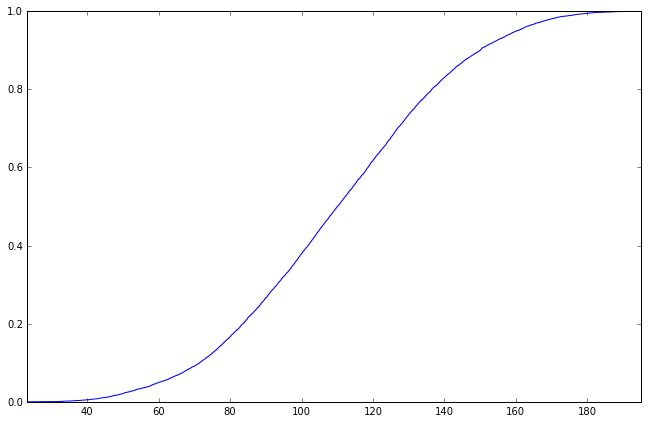

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()


[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


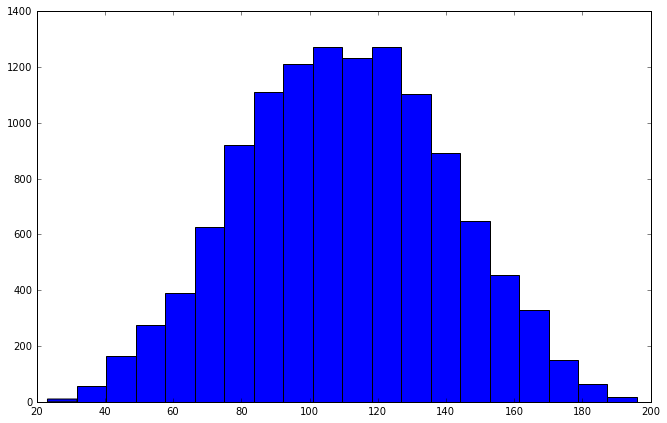

[   6.   10.   20.   41.   43.   69.   84.  114.  120.  103.  114.  105.
  103.   81.   76.   40.   40.   33.   14.    4.]


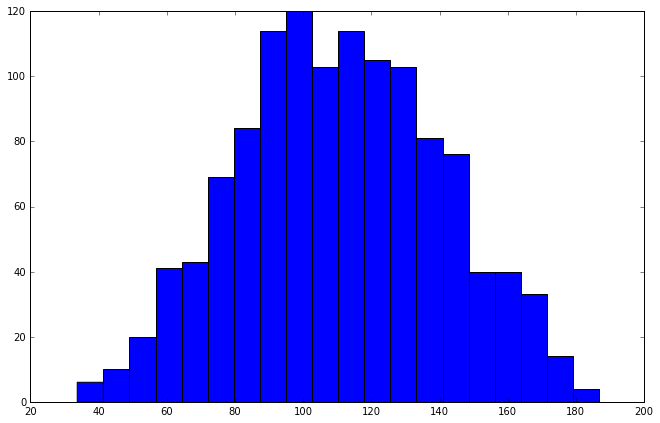

[   4.   11.   20.   35.   49.   63.  103.  114.  115.  125.  116.  132.
   88.   77.   72.   32.   33.   20.    8.    3.]


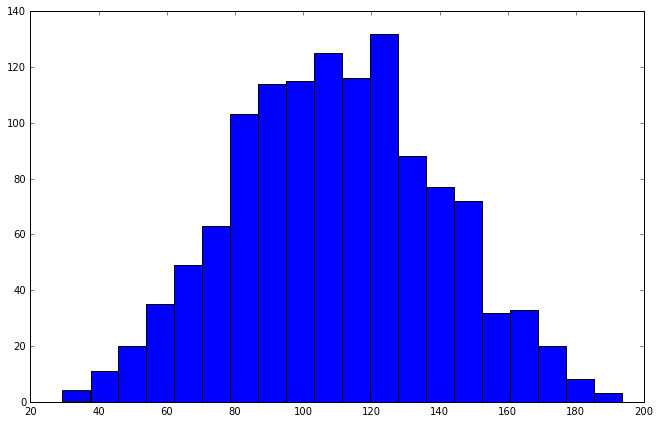

[   6.    8.   22.   26.   46.   53.   83.  114.  106.  123.  118.  114.
  104.   94.   76.   59.   28.   24.   11.    5.]


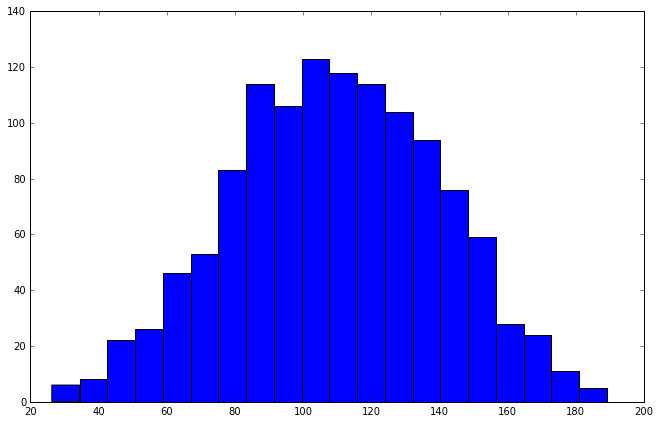

[   7.   15.   18.   33.   43.   79.  104.   92.  123.  136.  122.  113.
  107.   63.   56.   48.   34.   19.    5.    3.]


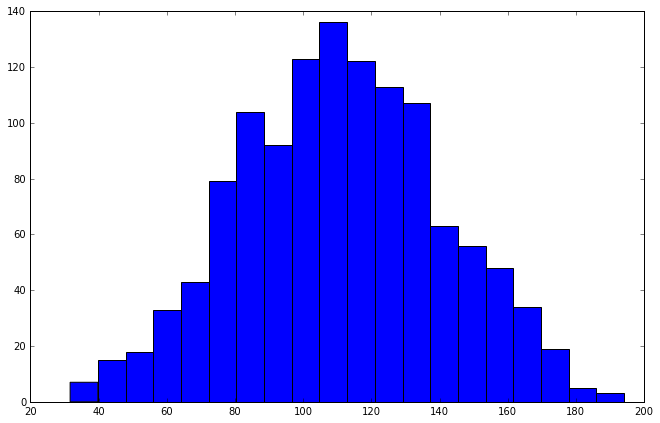

[   4.   14.   14.   28.   48.   68.   70.  103.   97.  118.  107.  123.
  113.   87.   84.   44.   48.   25.   20.    5.]


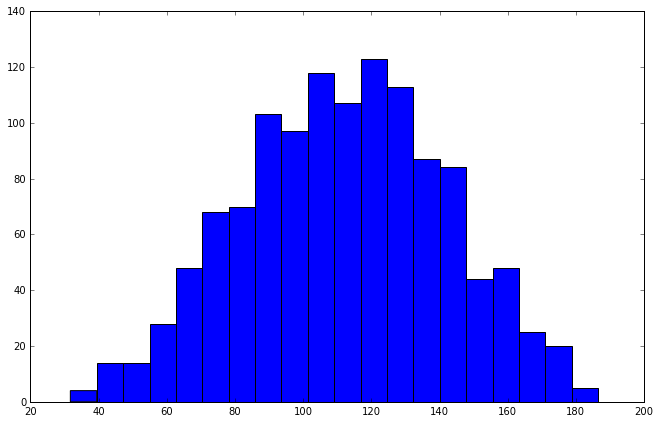

[   2.   11.   18.   21.   29.   60.  102.   94.  121.  105.  115.  121.
  122.   92.   64.   49.   45.   28.   15.    6.]


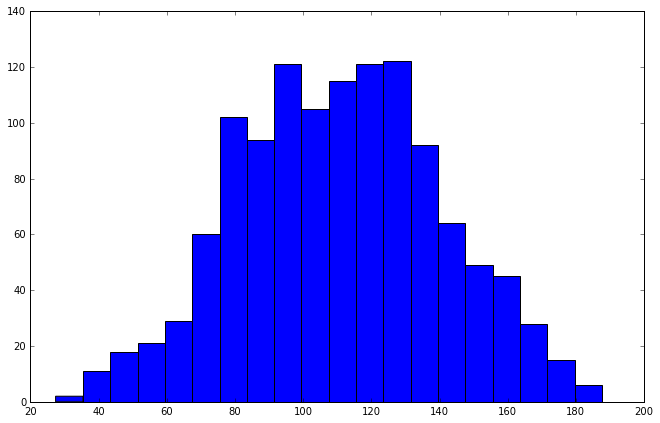

[   8.   15.   29.   38.   56.   80.   86.  111.  121.  123.  115.  121.
   92.   76.   58.   45.   27.   10.    5.    4.]


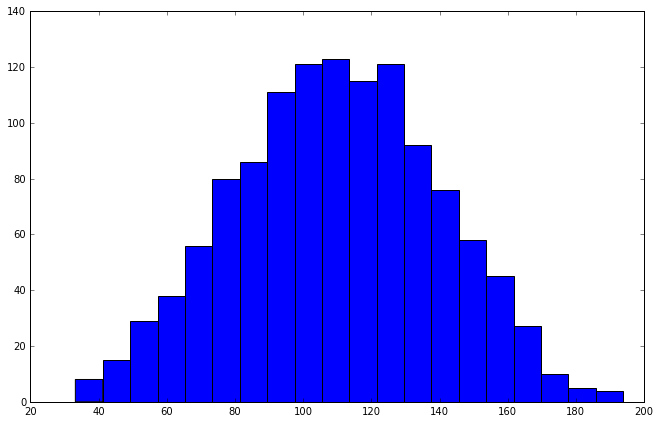

[   5.   17.   31.   33.   39.   70.   84.   94.   94.  130.  115.  111.
   97.   88.   71.   54.   34.   32.   14.    7.]


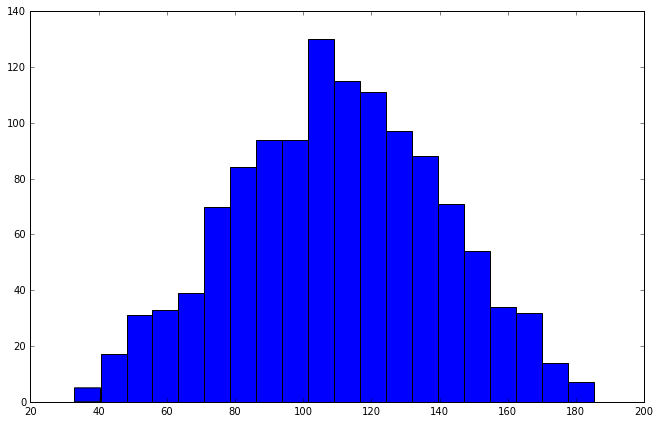

[   7.   14.   28.   33.   77.   89.  110.   90.  106.  102.  102.  136.
  109.   64.   65.   45.   23.    9.    6.    5.]


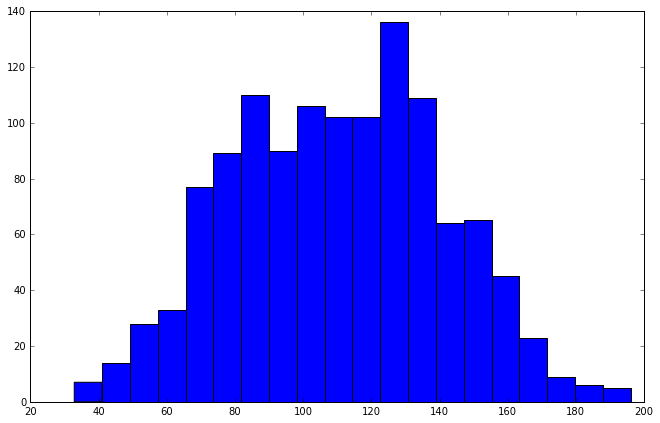

[   2.    6.   16.   31.   36.   50.   93.  108.  130.  126.  120.   96.
  121.  100.   65.   48.   35.   22.    8.    7.]


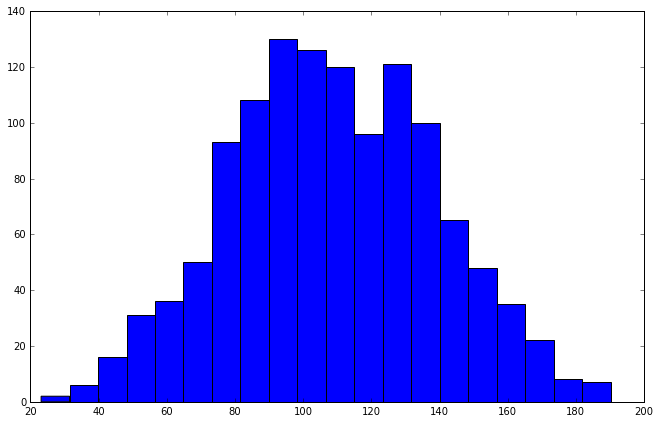

In [7]:
for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins)
    print(n)
    plt.show()


# 1.3

In [8]:
import pandas as pd
import scipy.stats as st

d = {}

for i in range(len(samples)):
    s = samples[i]
    stat = {}
    stat[r'$\bar{x}$'] = s.mean()
    stat[r'$x_{med}$'] = s.median()
    stat[r'$x_{mid}$'] = s.mid()
    stat[r'$x_{mode}$'] = s.mode()
    stat[r'$s^2$'] = s.variance()
    stat[r'$s$'] = s.std()
    stat[r'$\hat{m}_3$'] = s.moment(3)
    stat[r'$\hat{m}_4$'] = s.moment(4)
    stat[r'$As$'] = s.skewness()
    stat[r'$Ex$'] = s.kurtosis()
    d[i] = pd.Series(stat)


In [9]:
keys = [r'$\bar{x}$', r'$x_{med}$', r'$x_{mid}$', r'$x_{mode}$', r'$s^2$', r'$s$',
        r'$\hat{m}_3$', r'$\hat{m}_4$', r'$As$', r'$Ex$']

df = pd.DataFrame(d, index=keys).transpose()
df

,$\bar{x}$,$x_{med}$,$x_{mid}$,$x_{mode}$,$s^2$,$s$,$\hat{m}_3$,$\hat{m}_4$,$As$,$Ex$
0,110.146511,110.0465,109.59490,101.097,902.224343,30.037050,89.286287,2.078277e+06,0.003295,-0.446862
1,110.655095,110.2815,110.27910,117.312,886.385414,29.772226,897.760464,1.943671e+06,0.034019,-0.526126
2,109.791253,109.8570,111.41475,102.463,890.820472,29.846616,1193.258175,2.058836e+06,0.044880,-0.405573
3,109.389364,109.7905,107.70935,109.625,921.416882,30.354849,-1343.396653,2.200084e+06,-0.048031,-0.408644
4,110.867077,111.0530,112.90345,126.378,890.930865,29.848465,571.644466,2.092723e+06,0.021496,-0.363525
5,111.848567,112.3940,109.11280,112.735,882.473720,29.706459,-839.342621,1.961780e+06,-0.032017,-0.480892
6,110.535185,110.4890,107.52105,132.653,889.791737,29.829377,115.939732,2.036420e+06,0.004368,-0.427883
7,109.571070,109.0660,113.54010,100.627,889.640139,29.826836,-142.704221,2.025492e+06,-0.005378,-0.440815
8,109.973110,109.4645,109.17840,104.641,912.201956,30.202681,-792.750998,2.076064e+06,-0.028774,-0.505068
9,110.194045,111.1455,114.45420,108.049,950.350184,30.827750,486.119120,2.221322e+06,0.016593,-0.540515


In [10]:
df.columns = ['x_avg', 'x_med', 'x_mid', 'x_mode', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
df.to_csv('table.csv')

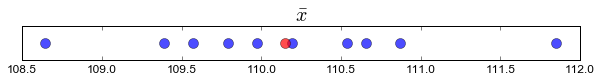

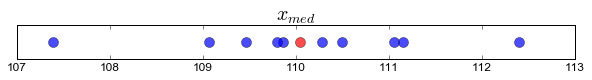

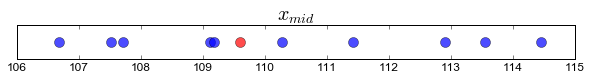

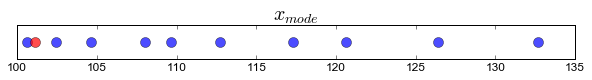

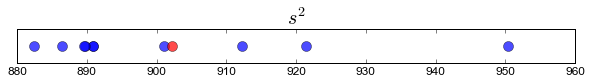

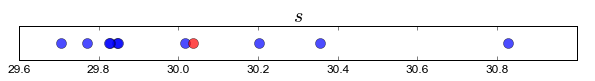

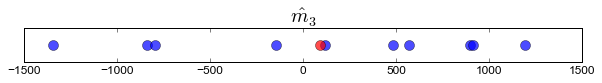

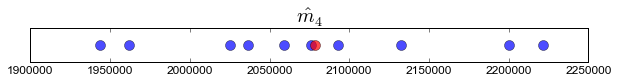

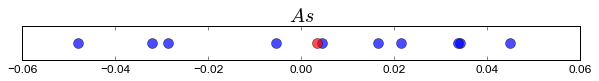

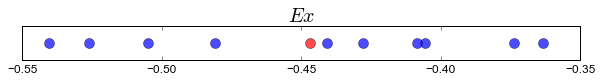

In [11]:
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

size = len(d) - 1

for i in range(len(keys)):
    key = keys[i]
    y = np.zeros(size)
    plt.figure(figsize=(10, 0.6))
    plt.title(key, fontsize=20)
    plt.plot([d[i][key] for i in range(1, size + 1)], y, marker='o', linestyle='None', alpha=0.7, markersize=10)
    plt.plot(d[0][key], 0, marker='o', color='r', alpha=0.7, markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)
    plt.show()

In [12]:
print(samples[0].percentile(2.5), end=' -- ')
print(samples[0].percentile(97.5))

51.46851 -- 167.7943


Получили границы интерквантильного промежутка:
$$J_{0.95} \approx [51, 168]$$

# 1.4

In [13]:
for sample in samples:
    print(sample.interval_mean(0.8))

(109.7979834100417, 110.49503826208945)
(109.5621379826502, 111.74805103374322)
(108.69556584311034, 110.88694071426671)
(108.27501942409828, 110.50370942836074)
(109.77132139760003, 111.96283204502295)
(110.75802500888814, 112.93910941734133)
(109.44012991521213, 111.63023910118132)
(108.47610902369665, 110.66603163204105)
(108.86435134640598, 111.08186898146283)
(109.06233943882195, 111.3257503972436)
(107.5383667105621, 109.74231787960183)


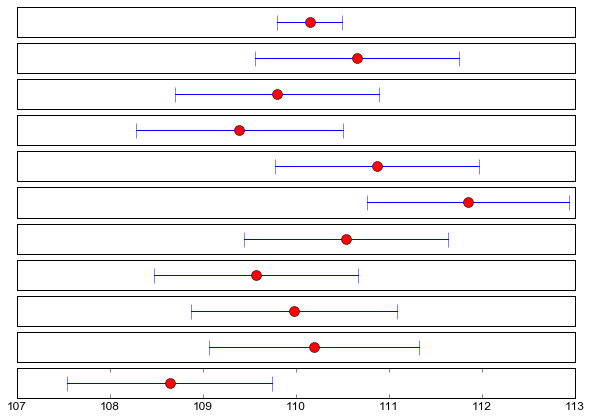

In [14]:
q = 0.8

fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_mean(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.mean(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

In [15]:
for sample in samples:
    print(sample.interval_variance(0.8))

(887.6282171287985, 917.24305488751872)
(842.37277530839435, 934.55796079538993)
(846.5876149750876, 939.23405204554012)
(875.66478896548711, 971.49329074210414)
(846.69252634210397, 939.3504444030533)
(838.65531311254915, 930.43367759094861)
(845.60996028178852, 938.1494075706554)
(845.46588967697255, 937.9895705785375)
(866.90742144902572, 961.77755945541378)
(903.16143458506224, 1001.9990357188881)
(856.33262898746875, 950.04551306408894)


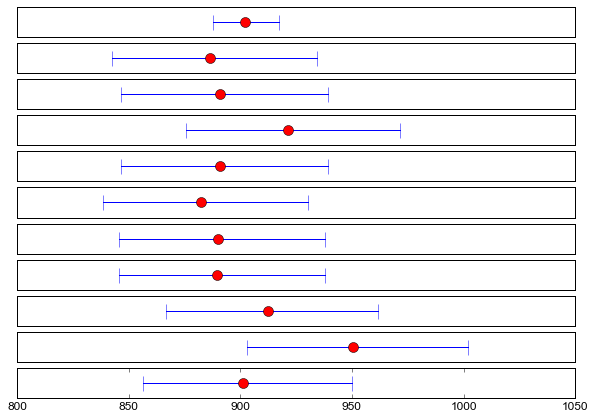

In [16]:
q = 0.8

fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_variance(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.variance(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

# 2.1

Остановим выбор на трех основных распределениях:
* Нормальное
* Логнормальное
* Гамма (Эрланга)

<img src="dist_info.png" width=1000px>

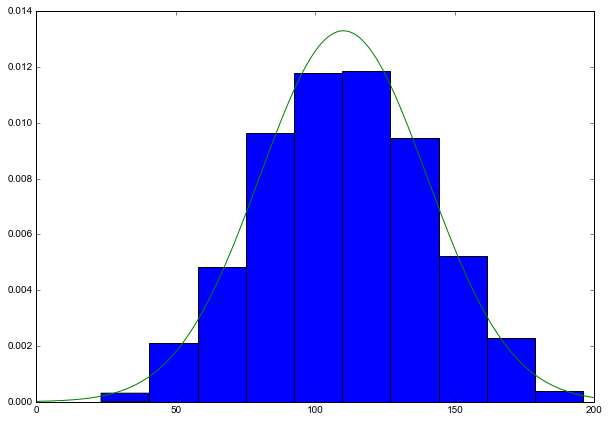

In [17]:
import matplotlib.mlab as mlab

s = samples[0]

plt.figure(figsize=(10, 7))

mu = 110
variance = 900
sigma = math.sqrt(variance)
xes = np.linspace(0, 200, num)
plt.hist(s.values, normed=True)
plt.plot(xes, st.norm.pdf(xes, loc=mu, scale=sigma))
plt.show()

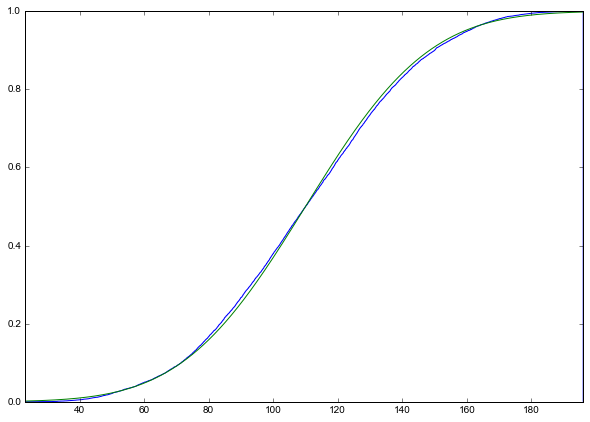

In [23]:
plt.figure(figsize=(10, 7))

mu = 110
variance = 900
sigma = math.sqrt(variance)
xes = np.linspace(0, 200, num)
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.plot(xes, st.norm.cdf(xes, loc=mu, scale=sigma))
plt.xlim([min(x), max(x)])
plt.show()
